# Segundo Proyecto de Señales

David Ruiz Lugo CC:1036672609

Sebastian Mora Colorado CC:1077720089

**1. Realizar un tutorial, mínimo dos páginas máximo tres, sobre la librería PyWavelet: instalación,opciones básicas y avanzadas**

PyWavelets es un software de transformación de ondas de código abierto para Python. Combina una interfaz simple de alto nivel y rendimiento.Las principales características de PyWavelets son:

• Transformada de Wavelet discreta directa e inversa 1D, 2D y nD (DWT e IDWT)
• DWT e IDWT multinivel 1D, 2D y nD
• Transformada de Wavelets estacionaria 1D, 2D y nD (Transformada de Wavelet no decimada)
• Descomposición y reconstrucción de paquetes de ondas 1D y 2D
• Transformada de Wavelet continua 1D
• Aproximaciones de cálculo de funciones de escala y wavelet
• Más de 100 filtros de Wavelet incorporados y soporte para Wavelet personalizadas
• Cálculos de precisión simple y doble
• Cálculos reales y complejos
• Resultados compatibles con Matlab Wavelet Toolbox (TM)

PyWavelets es muy fácil de usar y empezar. Simplemente instale el paquete, abra el shell interactivo de Python y escribir

In [ ]:
import pywt

Primero, repasemos los métodos para crear un Waveletobjeto. La forma más fácil y conveniente es utilizar el nombre incorporado Wavelets. Estas ondas están organizadas en grupos llamados familias de ondas. Con la siguiente linea se puede ver las familias con que trabaja wavelets

In [ ]:
pywt.families()

La wavelist()función se utiliza para obtener la lista de nombres de ondas en cada familia.

In [ ]:
for family in pywt.families():
  print("%s family: " % family + ', '.join(pywt.wavelist(family)))

Si necesita utilizar una Wavelets específica que no está incluida en la lista, es muy fácil hacerlo. Simplemente pase una lista de cuatro filtros o un objeto con un atributo como argumento al constructor

In [ ]:
import math
c = math.sqrt(2)/2
dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
filter_bank = [dec_lo, dec_hi, rec_lo, rec_hi]
myWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)

class HaarFilterBank(object):
  @property
  def filter_bank(self):
    c = math.sqrt(2)/2
    dec_lo, dec_hi, rec_lo, rec_hi = [c, c], [-c, c], [c, c], [c, -c]
    return [dec_lo, dec_hi, rec_lo, rec_hi]
filter_bank = HaarFilterBank()
myOtherWavelet = pywt.Wavelet(name="myHaarWavelet", filter_bank=filter_bank)

Cuando sepamos todos los nombres, se crea un Waveletobjeto:

In [ ]:
w= pywt.Wavelet('db3')

Aquí se muestra una breve información sobre algunas propiedades de los wavelets

In [ ]:
print(w)

Pero la información más importante son los coeficientes de los filtros de ondas, que se utilizan en la Transformada de ondas discretas . Estos coeficientes pueden ser obtenidos a través de los atributos

In [ ]:
def print_array(arr):
  print("[%s]" % ", ".join(["%.14f" % x for x in arr]))

Ahora se debe realizar alguna extrapolación de los datos de entrada para extender la señal antes de calcular la Transformada de Onda Discreta ya que dependiendo del método de extrapolación, se pueden introducir artefactos significativos en los bordes de la señal durante ese proceso, lo que a su vez puede conducir a cálculos inexactos del DWT en los extremos de la señal.

PyWavelets proporciona varios métodos de extrapolación de señales que se pueden utilizar para minimizar este efecto negativo
Con la siguiente linea de codigo se puede saber los metodos de extrapolacion

In [ ]:
print(pywt.Modes.modes)

Antes de realizar la transformacion es necesario revizar que modo de extension es el mas adecuado para la señal que se esta trabajando

**Transformada de Wavelets discreta (DWT)**

La transformación de wavelet se trata de análisis, eliminación de ruido y compresión de señales e imágenes

Para usar la transformada directa se usa pywt.dwt( datos , Wavelets , mode = 'Modo de extension de señal' , axis = "eje de analisis" )

Para este comando se requiere haber establecido con anterioridad los siguientes parametros. 
datos : Señal de entrada
wavelet : objeto o nombre de Wavelet 
modo : Modo de extensión de señal.
eje: Eje sobre el que calcular la DWT

Los datos de salida que se obtienen son los coeficientes de aproximación y detalle (cA, cD) en una tupla.

Hagamos una muestra de datos usando la Wavelets

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x, 'db2', mode='symmetric',axis=-1)

Y los coeficientes de aproximación y detalles están en cAy cD respectivamente:

In [ ]:
print(cA)
print(cD)

**Transformada discreta inversa de wavelets**

La transformada inversa de wavelets se utiliza para reconstruir una señal a partir de sus coeficientes de aproximacion y detalle; El codigo para implementar la transformada es el siguiente

In [ ]:
print(pywt.idwt(cA, cD, 'db2',mode='symmetric',axis=-1))

Una de las caracteristicas que tiene esta transformada es que los coeficientes cA y cD pueden contener argumentos de valor nulo y la recostruccion se realizara de igual manera, usando solo los demas argumentos.

**2) Algoritmo de Mallat usando la librería PyWavelet**

Documentacion de la libreria **PyWavelet** para el algoritmo Mallat: https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html#multilevel-decomposition-using-wavedec

En el siguiente tutorial se muestra el uso básico de la librería PyWavelet para la descomposición multinivel de señales o imágenes en coeficientes de aproximación y detalle con fin de su compresión o filtrado de ruido.



**Descomposición de unico nivel**
Se hace uso de la función pywt.dwt la cual devuelve una **TUPLA** de aproximación (cA) y una **TUPLA** de detalle (cD).

pywt.dwt(data, wavelet, mode='MODE', axis=-1)
 - Data: señal de entrada
 - Wavelet: wavelet escogido
 - Mode (str, opcional): modo de extrapolación de los datos de entrada para extender la señal antes de calcular la transformada
 - Axis (int, opcional): Eje sobre el que calcular la DWT, si no se proporciona, se utiliza el último eje.

In [ ]:
import numpy as np
import pywt
x=np.arange(0,10)
print(x)
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5, 6], 'db1')
print(cA)
print(cD)

[0 1 2 3 4 5 6 7 8 9]
[2.12132034 4.94974747 7.77817459]
[-0.70710678 -0.70710678 -0.70710678]


**Descomposición multinivel**

Se hace uso de la función pywt.dwt la cual devuelve una lista ordenada de matrices de coeficientes donde ndenota el nivel de descomposición [cA_n, cD_n, cD_n-1,…, cD2, cD1] **(Nivel mas alto de descomposición a la izquierda)**, donde n representa el nivel de descomposición, el primer elemento es una matriz de coeficientes de aproximacion y los siguientes elementod matrices de coeficientes de detalles.

pywt.wavedec(data, wavelet, mode='symmetric', level=None, axis=-1)

- Data: señal de entrada
 - Wavelet: wavelet escogido
 - Mode (str, opcional): modo de extrapolación de los datos de entrada para extender la señal antes de calcular la transformada
 - Level: debe ser > = 0, si level='NONE', se calculará mediante la función dwt_max_level
 - Axis (int, opcional): Eje sobre el que calcular la DWT, si no se proporciona, se utiliza el último eje.



In [ ]:
from pywt import wavedec
x=np.arange(0,10)
print(x)
cA2, cD2, cD1 = wavedec(x, 'haar', level=2) #ya que se haran 2 niveles de descomposición se tienen 2 matrices de coeficientes de detalles
print(cA2)
print(cD2)
print(cD1)

[0 1 2 3 4 5 6 7 8 9]
[ 3. 11. 17.]
[-2. -2.  0.]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678]


**Nivel máximo de descomposición**

Puede ser de Interés saber el nivel máximo de descomposición antes de encontrar la transformada wavelet, para esto hacemos uso de la función pywt.dwt_max_level, la cual nos retorna el nivel máximo de descomposición útil.



pywt.dwt_max_level(data_len, filter_len)

- Data_len : Longitud de entrada

- Filter_len : Longitud del filtro, nombre del wavelet o un objeto wavelet.

In [ ]:
w = pywt.Wavelet('sym5')
lv1=pywt.dwt_max_level(data_len=1000, filter_len=w.dec_len) #longitud del filtro
lv2=pywt.dwt_max_level(1000, w) # objetoo wavelet
lv3=pywt.dwt_max_level(1000, 'sym5')# nombre del wavelet usado
print(lv1)
print(lv2)
print(lv3)

6
6
6


**3) cuales de las wavelets que ofrece la librería podría capturar mejor el artefacto de parpadeo en las señales EEG**

Uno de los principales problemas que surgen a la hora de llevar a cabo un EEG son los llamados artefactos, señales que provienen de fuentes ajenas a la actividad cerebral y que se solapan con la señal resultante de la actividad cerebral, enmascarándola. Su eliminación es de gran relevancia a la hora de estudiar registros de situaciones como una crisis epiléptica.
En este trabajo se realizará la eliminación de artefactos provocados por movimientos oculares y la técnica que se va a utilizar para el análisis adecuado de las señales es por medio del uso de wavelets.
Estos wavelets permite realizar un análisis a distintas escalas de la señal aplicando unos filtros reiteradamente para tener varios niveles de aproximación y de detalle. Esta última propiedad es en la que nos vamos a enfocar ya que es la que permite descomponer las señales siguiendo el modelo del algoritmo de Mallat.
Debido a que las wavelets poseen gran cantidad de familias nos enfocaremos en trabajar con la db4, esto debido a que estudios realizado en diferentes wavelets demostró que en la eliminación de artefactos oculares. la db4 presenta un comportamiento más regular para este tipo de artefactos llevando a que este tenga una mayor ventaja a la hora de destacar una mayor efectividad en el proceso de eliminación y una mayor precisión para conservar información ajena del artefacto.
A pesar de que este wavelet ha demostrado que puede eliminar por completo los artefactos deseados posee ciertos problemas en el momento de aplicar la técnica en señales no oscilatorias sin embargo sigue siendo la mejor opción.
Cabe resaltar que a pesar de la extensa investigación centrada en detección de artefactos oculares y en la eliminación de señales, hasta la fecha no hay consenso de una solución óptima para todo tipo de artefacto


"universidad polit ecnica de madrid.”(http://oa.upm.es/56803/1/TFG_PABLO_LOPEZ_CALLEJO.pdf)

(https://www.redalyc.org/jatsRepo/4988/498853956005/html/index.html)

# Parte 2 

In [ ]:
#manejo de elementos del sistema, como carpetas
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt
import glob
import pandas as pd
import pywt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
archivos_g1 = glob.glob('/content/drive/Shareddrives/biosenales_sistemas/datasets_proyecto2/*.mat')

In [ ]:
data = sio.loadmat(archivos_g1[1]);
senal = data['data']


#Rutina 1


In [ ]:
#Detecta la señal que contiene epocas atipicas
def datip(senal):
#Debido a que la señal es ontinua, esta se va a dividir en epocas
  def epocas(señal):
      c=señal.shape[1]
      d=np.delete(señal,(range(303000,c)),axis=1)
      z=d.reshape((7,3000,101), order='f')
      return z #Retorna una señal con canales,puntos y epocas

  señal1=epocas(senal)
  señal1.shape

  canales = señal1.shape[0]
  epocas = señal1.shape[2]
  desviacion = np.zeros((señal1.shape[0]))
#Se calcula la desviacion para todas las epocas de un canas
  for c in range(canales):
      desviacion[c] = np.std(np.absolute(señal1[c,:,:]))
#Se realiza la deteccion de epocas atipicas para todos los canales de la señal
  indice=np.zeros((señal1.shape[0],señal1.shape[2]))
  for j in range(desviacion.shape[0]):
       promedio=np.mean(np.absolute(señal1[j,:,:]))
       print('Analisis del canal',j+1)
       for i in range(señal1.shape[2]):
           if np.mean(np.absolute(señal1[j,:,i])) >= promedio+(1*desviacion[j]):
                 print('dato atipico epoca',i+1)
                 indice[j][i]=1
           else: 
               continue
  return señal1, indice 

**EJEMPLO RUTINA 1**

Para el analisis de los datos primero se muestra los datos atipicos que hay en los canales de la primera señal

In [ ]:
senal1, indice = datip(senal)

Analisis del canal 1
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 2
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 3
dato atipico epoca 2
Analisis del canal 4
dato atipico epoca 2
dato atipico epoca 74
Analisis del canal 5
dato atipico epoca 2
Analisis del canal 6
Analisis del canal 7
dato atipico epoca 10
dato atipico epoca 72


In [ ]:
print(senal1.shape)
indice.shape

(7, 3000, 101)


(7, 101)

Se grafica la el canal con la epoca atipica #




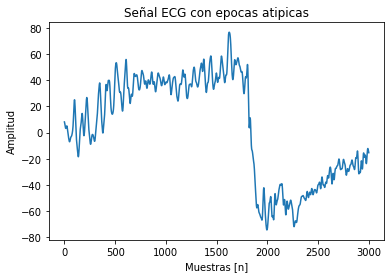

In [135]:
plt.xlabel('Muestras [n]')
plt.ylabel('Amplitud')
plt.title('Señal ECG con epocas atipicas')
plt.plot(senal1[1,:,73])

A continuacion se grafica el canal con una epoca tipica

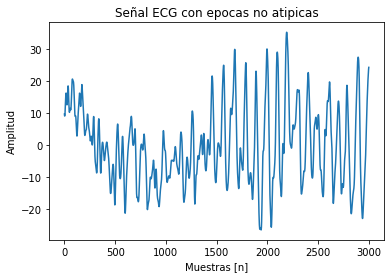

In [136]:
plt.xlabel('Muestras [n]')
plt.ylabel('Amplitud')
plt.title('Señal ECG con epocas no atipicas')
plt.plot(senal1[1,:,79])

Se puede observar que el rango de la amplitud es mas tolerable que el de la epoca atipica
desviacion estandar 

Ahora como se observo en el datip se espera tener un total de 4 datos atipicos en la primera señal 

In [137]:
print(indice)

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Se puede observar que la primera señal presenta datos atipicos en el canal 1 y canal 2, estos se ven representados por el numero 1 y se puede observar que los 2 tienen 2 datos atipicos como se esperaba

#Rutina 2
La siguiente función realiza la aplicación de la limpieza Wavelet donde **se debe seleccionar el tipo de aplicación del umbralización (soft o hard), el tipo de estimación del umbral y el tipo de ponderación.**

**wavelet_denosing(inlet,lamda, sigmma, thresthold)**

**Parametros**

 - senal full: señal de entrada (x canales)
 - wavelet (str): wavelet a aplicar
 - lamda (str): tipo de umblar (sure, minimax, universal)
 - sigmma (str): tipo de ponderacion (sln,mln,one)
 - thresthold (str): umbralizacion (hard, soft)

In [ ]:
def filtro_senal_full(senal_full, indice,lamda,sigmma,thresthold):
  #filtro para una epoca atipica
  def wavelet_denosing(inlet,lamda, sigmma, thresthold):
    import numpy as np;
    import matplotlib.pyplot as plt
    import pywt
    lamda1=lamda
    sigmma1=sigmma
    n=len(inlet)
    w= pywt.Wavelet('db4') #se crea objeto wavelet
    mxlv=pywt.dwt_max_level(n, w) #se busca un nivel adecuado para la descomposición
    if mxlv <= 8:
      mxlv=mxlv
    else:
      mxlv=8
    
    vcof=np.zeros(mxlv+1)
    vcof=pywt. wavedec(inlet, w, level=mxlv) #vector con matris de coeficientes de aproximacion y detalle

    for i in range(len(vcof)-1):
      # se elije el lamba segun usuario
      if lamda1=='sure':# sure
        sx2 = np.sort(abs(inlet))**2
        v1=np.arange(0,n)
        v2=np.arange(n,0,-1)
        risks = (n-(2*v1)+(np.cumsum(sx2)+v2*sx2))/n
        k = np.min(risks)
        lamda = sx2[int(k)]
            
      elif lamda1=='minimax':
        lamda= 0.3936 + 0.1829 *(np.log(n)/np.log(2))# minimax
      
      else:
        lamda= np.sqrt(2*(np.log(n))) #universal

      # se elije el siggma segun usuario
      if sigmma1=='sln':# ponderación es proporcional a la AMD del primer nivel de descomposición
          sigmma=(np.median(np.abs(vcof[1])))/0.6745
          
      elif sigmma1=='mln':#ponderación es proporcional a la AMD de los niveles de descomposición a umbralizar
          sigmma=(np.median(np.abs(vcof[i+1])))/0.6745

      else:
          sigmma=1

      #Se selecciona el tipo de umbralizacion
      #SOFT
      if thresthold=='soft':
        for j in range(len(vcof[i+1])):
          if np.abs(vcof[i+1][j])<(lamda*sigmma):
            vcof[i+1][j]=0
          else:
            vcof[i+1][j]=np.sign(vcof[i+1][j])*(np.abs(vcof[i+1][j]-lamda))

      #HARD
      else:
        for j in range(len(vcof[i+1])):
            if np.abs(vcof[i+1][j])<lamda*sigmma:
              vcof[i+1][j]=0
            else:
              continue
    
    #Se reconstruye la senal y luego al tener las amplitudes grandes correspondientes a los artefactos oculares, esta se resta a la senal original
    denosing=np.zeros(n)
    denosing=pywt.waverec(vcof, w)
    outlet=inlet-denosing

    return outlet# Se retorna la senal filtrada

  #se filtra toda la senal  
  senal1=senal_full
  senal2=senal1.copy()
  for i in range (senal1.shape[0]):
    for j in range (senal1.shape[2]):
      if indice [i,j]==1:
        senal2[i,:,j]=wavelet_denosing(senal1[i,:,j],lamda, sigmma, thresthold)
      else:
        continue
  return senal2

  

**EJEMPLO DE LA RUTINA 2**

Para probar la rutina 2 hacemos uso de una de las epocas atipicas encontradas en la rutina 1

Cargamos la senal de 7 canales

In [ ]:
inlet=senal1

In [ ]:
outlet=[]

In [ ]:
outlet=filtro_senal_full(inlet, indice, 'minimax', 'mln', 'soft')# se realiza el filtrado con la rutina 2

<Figure size 432x288 with 0 Axes>

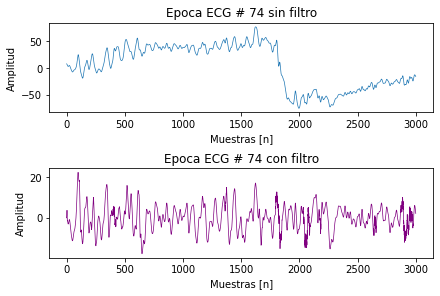

In [ ]:
plt.figure()
fig, ax = plt.subplots(2,constrained_layout=True)
ax[0].plot(senal1[1,:,73],linewidth=0.7)
ax[0].set_xlabel('Muestras [n]')
ax[0].set_ylabel('Amplitud')
ax[0].set_title('Epoca ECG # 74 sin filtro')
ax[1].plot(outlet[1,:,73],linewidth=0.7,color='purple')
ax[1].set_xlabel('Muestras [n]')
ax[1].set_ylabel('Amplitud')
ax[1].set_title('Epoca ECG # 74 con filtro')
plt.show()

#Rutina 3
La siguiente función realiza graficas que faciliten el analisis de filtros utilizados sobre señales divididas en X canales y epocas de 3000 (tresmil) puntos. 
Muestra graficos de las epocas que se han filtrado para cada canal y un grafico de los primeros 30.000 (treintamil) puntos de cada canal.

**comparacion(signal, denosing, indice)**

**Parametros:**

- Signal (array): Señal original

- Denosing (array): Señal filtrada

- Indice (array): Matriz de indices correspondientes a las epocas filtradas por canal



In [ ]:
def comparacion(senal1,senal2,indice):
  signal1=np.zeros((senal1.shape[0],senal1.shape[1]*senal1.shape[2]))
  denosing1=np.zeros((senal2.shape[0],senal2.shape[1]*senal2.shape[2]))
  for i in range(senal2.shape[0]):
    contador=0
    for j in range(senal2.shape[2]):
      signal1[i,3000*j:3000*j+3000]=senal1[i,:,j]
      denosing1[i,3000*j:3000*j+3000]=senal2[i,:,j]

      if indice[i,j]==1:
        contador+=1
        if contador==1:
          print('\n \n \n Se grafican todas las epocas filtradas del canal #',i+1)
        print('Epoca #',1+j)
        plt.figure()
        fig, ax = plt.subplots(2,constrained_layout=True)
        ax[0].plot(senal1[i,:,j],linewidth=0.7)
        ax[0].set_xlabel('Muestras [n]')
        ax[0].set_ylabel('Amplitud')
        ax[0].set_title('Epoca ECG # '+str(1+j)+' sin filtro')
        ax[1].plot(senal2[i,:,j],linewidth=0.7,color='purple')
        ax[1].set_xlabel('Muestras [n]')
        ax[1].set_ylabel('Amplitud')
        ax[1].set_title('Epoca ECG # '+str(1+j)+' con filtro')
        plt.show()
      else:
        continue
    print('\n \n \n Se grafican los primeros 30.000 puntos de las señales a comparar para el canal #',i+1)
    plt.figure()
    fig, ax = plt.subplots(2,constrained_layout=True)
    ax[0].plot(signal1[i,0:30000],linewidth=0.7)
    ax[0].set_xlabel('Muestras [n]')
    ax[0].set_ylabel('Amplitud')
    ax[0].set_title('Señal ECG sin filtro, canal #' + str(i+1))
    ax[1].plot(denosing1[i,0:30000],linewidth=0.7,color='purple')
    ax[1].set_xlabel('Muestras [n]')
    ax[1].set_ylabel('Amplitud')
    ax[1].set_title('Señal ECG con filtro, canal #' + str(i+1))
    plt.show()
       

**EJEMPLO DE LA RUTINA 3**

Para probar la rutina 3 hacemos uso de una de las epocas atipicas encontradas en la rutina 1

Cargamos la senal de 7 canales

In [ ]:
senal_as=inlet
senal_ft=outlet


 
 
 Se grafican todas las epocas filtradas del canal # 1
Epoca # 1


<Figure size 432x288 with 0 Axes>

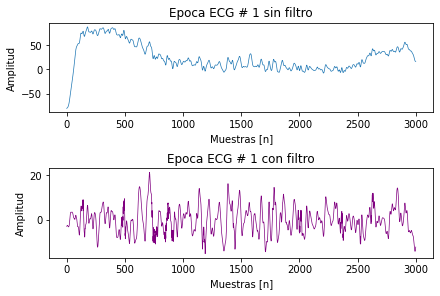

Epoca # 2


<Figure size 432x288 with 0 Axes>

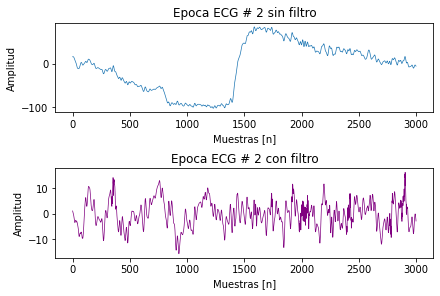

Epoca # 10


<Figure size 432x288 with 0 Axes>

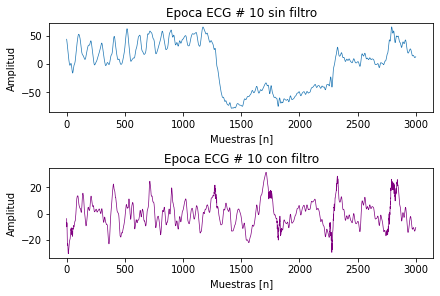

Epoca # 13


<Figure size 432x288 with 0 Axes>

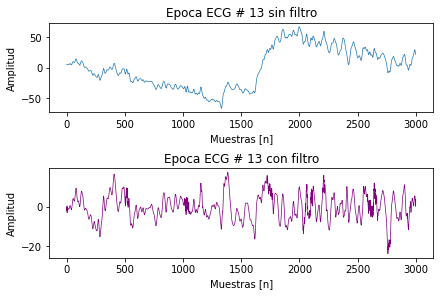

Epoca # 26


<Figure size 432x288 with 0 Axes>

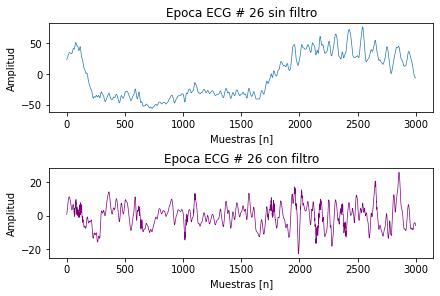

Epoca # 74


<Figure size 432x288 with 0 Axes>

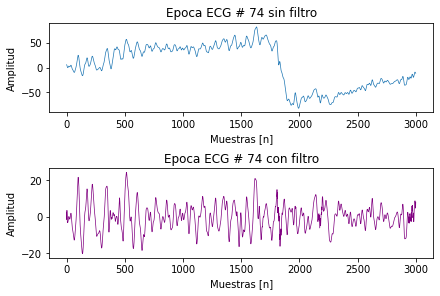


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 1


<Figure size 432x288 with 0 Axes>

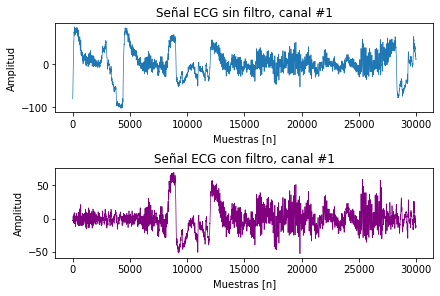


 
 
 Se grafican todas las epocas filtradas del canal # 2
Epoca # 1


<Figure size 432x288 with 0 Axes>

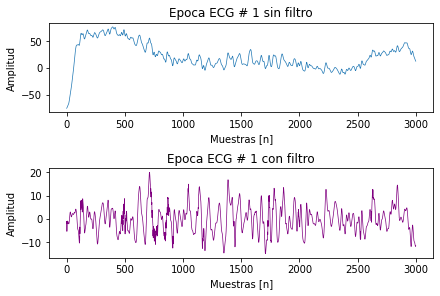

Epoca # 2


<Figure size 432x288 with 0 Axes>

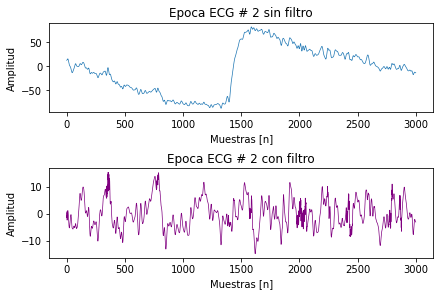

Epoca # 10


<Figure size 432x288 with 0 Axes>

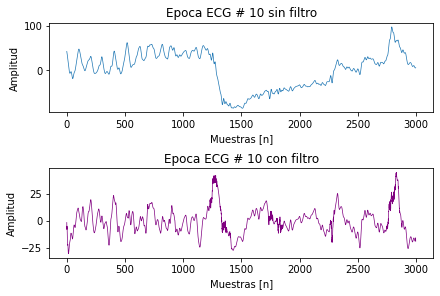

Epoca # 13


<Figure size 432x288 with 0 Axes>

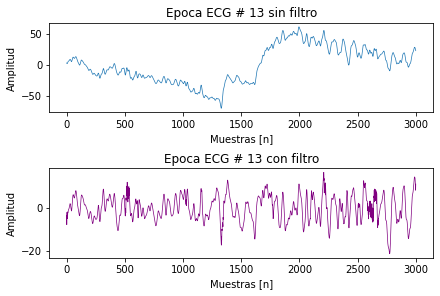

Epoca # 26


<Figure size 432x288 with 0 Axes>

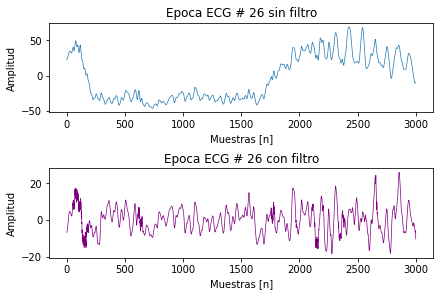

Epoca # 74


<Figure size 432x288 with 0 Axes>

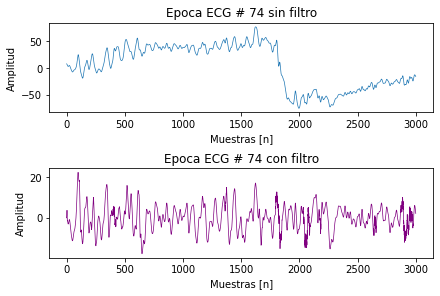


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 2


<Figure size 432x288 with 0 Axes>

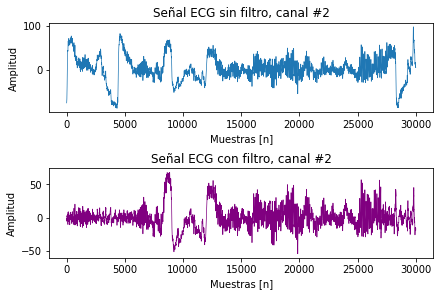


 
 
 Se grafican todas las epocas filtradas del canal # 3
Epoca # 2


<Figure size 432x288 with 0 Axes>

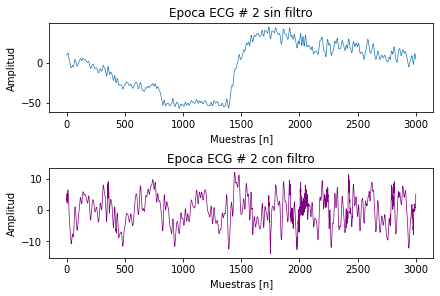


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 3


<Figure size 432x288 with 0 Axes>

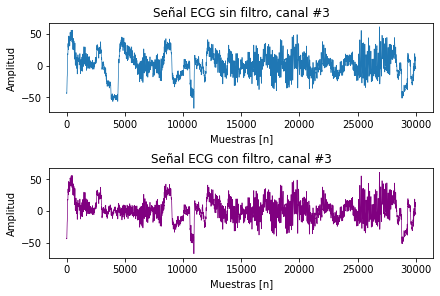


 
 
 Se grafican todas las epocas filtradas del canal # 4
Epoca # 2


<Figure size 432x288 with 0 Axes>

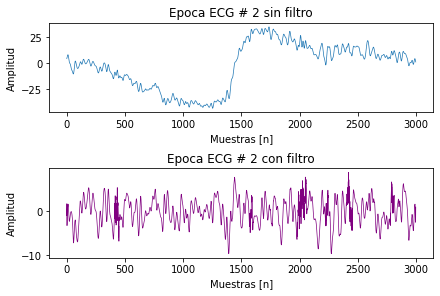

Epoca # 74


<Figure size 432x288 with 0 Axes>

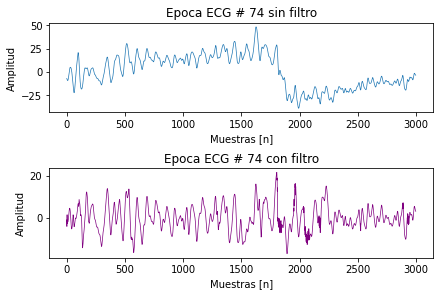


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 4


<Figure size 432x288 with 0 Axes>

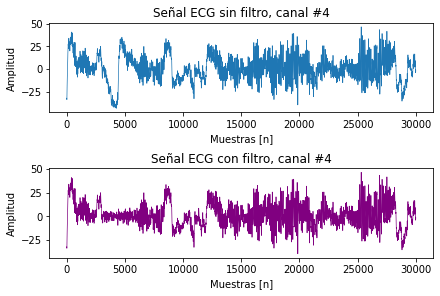


 
 
 Se grafican todas las epocas filtradas del canal # 5
Epoca # 2


<Figure size 432x288 with 0 Axes>

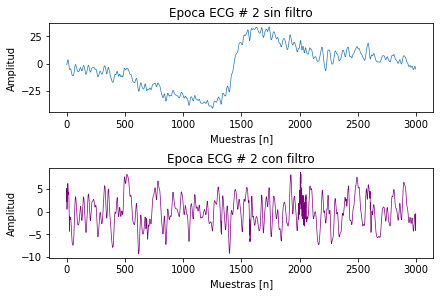


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 5


<Figure size 432x288 with 0 Axes>

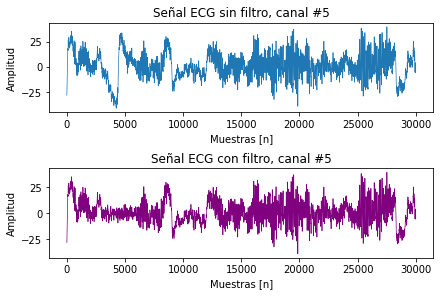


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 6


<Figure size 432x288 with 0 Axes>

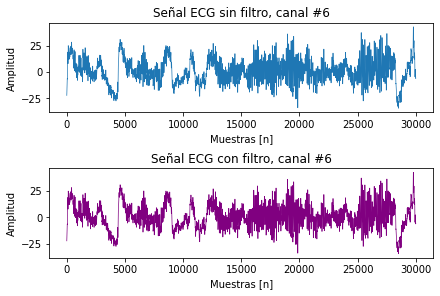


 
 
 Se grafican todas las epocas filtradas del canal # 7
Epoca # 10


<Figure size 432x288 with 0 Axes>

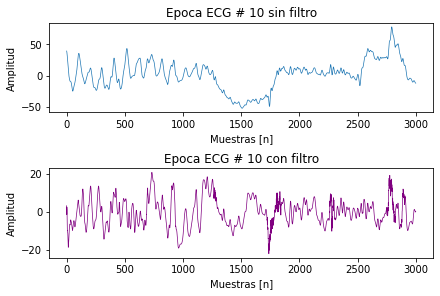

Epoca # 72


<Figure size 432x288 with 0 Axes>

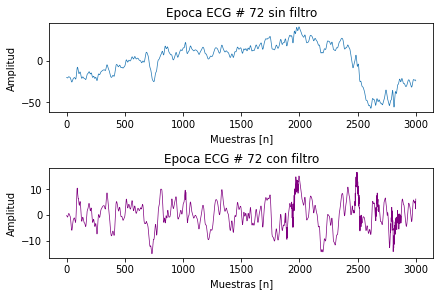


 
 
 Se grafican los primeros 30.000 puntos de las señales a comparar para el canal # 7


<Figure size 432x288 with 0 Axes>

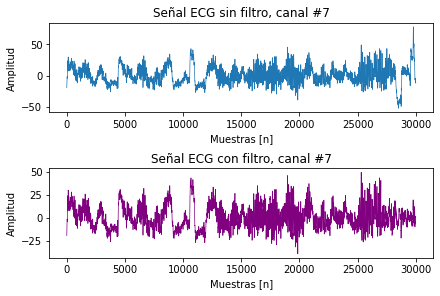

In [ ]:
comparacion(senal_as,senal_ft,indice)# se grafican las epocas filtradas para cada canal y los primeros 3000(tresmil) puntos de cada canal

#ENTREGABLE


**Punto 3**

Calculo de energia

In [ ]:
senal_as=inlet
senal_ft=outlet

In [ ]:
senal_as1=np.zeros((senal_as.shape[0],senal_as.shape[1]*senal_as.shape[2]))
senal_ft1=np.zeros((senal_ft.shape[0],senal_ft.shape[1]*senal_ft.shape[2]))
for i in range(senal_ft.shape[0]):
    for j in range(senal_ft.shape[2]):
      senal_as1[i,3000*j:3000*j+3000]=senal_as[i,:,j]
      senal_ft1[i,3000*j:3000*j+3000]=senal_ft[i,:,j]

In [ ]:
energia_as=np.zeros((7))
energia_ft=np.zeros((7))
canal=np.arange(1,8)
for i in range(7):
  energia_as[i]=sum(senal_as1[i,:]**2)
  energia_ft[i]=sum(senal_ft1[i,:]**2)


tabla = pd.DataFrame({'Canal':canal,'Energia_as':energia_as,'Energia_ft':energia_ft})
tabla=tabla.set_index('Canal')
print(tabla)

         Energia_as    Energia_ft
Canal                            
1      1.000198e+08  6.944338e+07
2      9.086799e+07  6.609700e+07
3      6.073720e+07  5.802807e+07
4      3.585769e+07  3.353233e+07
5      3.258480e+07  3.147905e+07
6      2.764637e+07  2.764637e+07
7      4.422237e+07  4.136410e+07


**Punto 4**

# Filtramos toda la base de datos 

In [ ]:
archivos_g1 = glob.glob('/content/drive/Shareddrives/biosenales_sistemas/datasets_proyecto2/*.mat')

In [ ]:
base_as=np.zeros((len(archivos_g1),7,3000*101))
base_ft=np.zeros((len(archivos_g1),7,3000*101))

In [ ]:
base_ft.shape

(20, 7, 303000)

In [ ]:
for a in range(base_as.shape[0]):
  data = sio.loadmat(archivos_g1[1]);
  senal = data['data']

  senal_as, indice=datip(senal)

  senal_ft=[]
  senal_ft=filtro_senal_full(inlet, indice, 'minimax', 'mln', 'soft')

  #reorganizamos las senales para poder obtener la caja y bigotes de cada canal 
  signal_base=np.zeros((senal_as.shape[0],senal_as.shape[1]*senal_as.shape[2]))
  denosing=np.zeros((senal_ft.shape[0],senal_ft.shape[1]*senal_ft.shape[2]))
  for i in range(senal_ft.shape[0]):
      contador=0
      for j in range(senal_ft.shape[2]):
        base_as[a,i,3000*j:3000*j+3000]=senal_as[i,:,j]
        base_ft[a,i,3000*j:3000*j+3000]=senal_ft[i,:,j]
  

Analisis del canal 1
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 2
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 3
dato atipico epoca 2
Analisis del canal 4
dato atipico epoca 2
dato atipico epoca 74
Analisis del canal 5
dato atipico epoca 2
Analisis del canal 6
Analisis del canal 7
dato atipico epoca 10
dato atipico epoca 72
Analisis del canal 1
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 2
dato atipico epoca 1
dato atipico epoca 2
dato atipico epoca 10
dato atipico epoca 13
dato atipico epoca 26
dato atipico epoca 74
Analisis del canal 3
dato atipico epoca 2
Analisis del canal 4
dato atipico epoca 2
dato atipico epoca 74
Analisis del canal 5
dato atipico epoca 2
Analisis del c

In [ ]:
base_as1=np.zeros((base_as.shape[1],base_as.shape[0]*base_as.shape[2]))
base_ft1=np.zeros((base_ft.shape[1],base_ft.shape[0]*base_ft.shape[2]))
for i in range(base_ft.shape[1]):
    for j in range(base_ft.shape[0]):
      base_as1[i,303000*j:303000*j+303000]=base_as[j,i,:]
      base_ft1[i,303000*j:303000*j+303000]=base_ft[j,i,:]

**SE GRAFICA CAJA Y BIGOTES PARA CADA CANAL DE LA BASE DE DATOS**

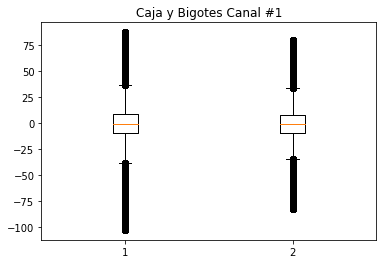

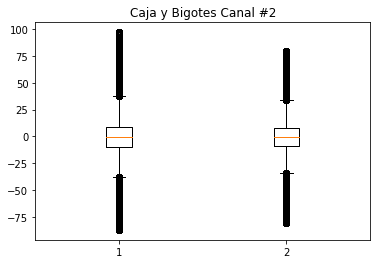

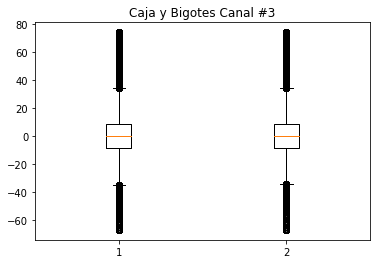

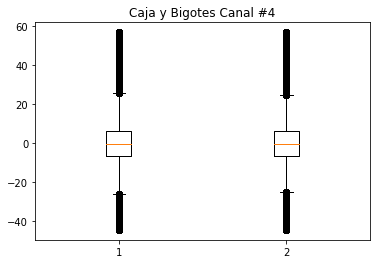

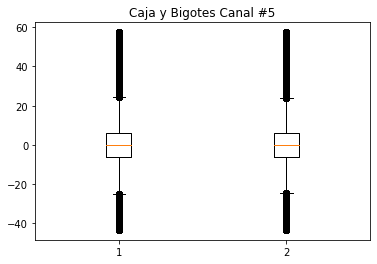

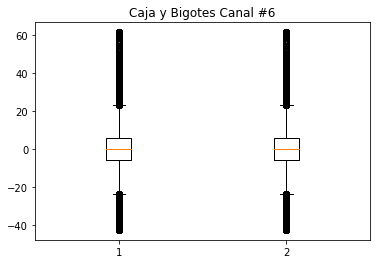

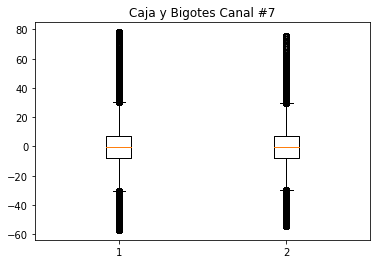

In [ ]:
for i in range(base_as1.shape[0]):
  data = [base_as1[i,:],base_ft1[i,:]]
  plt.title('Caja y Bigotes Canal #'+ str(i+1))
  plt.boxplot(data)
  plt.show()

**Analisis:**
Se puede observar en las graficas como los canales 1 y 2 tienen un mayor efecto del filtro ya que se ve facilmente que los datos atipicos de la senal disminuyen, esta es una evidencia clara de el filtro aplicado, el cual podria filtrar mas si se toman menos de 2 desviaciones estandar como umbral de filtrado. El filtro del presente trabajo se definio para epocas atipicas mayores o iguales a 2 desviaciones estandar 

**PRUEBA DE HIPOTESIS**

In [ ]:
#HIPÓTESIS NULA: Los datos probablemente no presentan diferencias significativas en la distribucoin de datos.
#HIPÓTESIS ALTERNATIVA: Los datos probablemente presentan diferencias significativas en la distribucion de datos.

In [ ]:
# Se evalua que tipo de pruebas es posible realizar a cada canal
from scipy.stats import shapiro
for i in range(7):
  print('\n \n Prueba para canal #', i+1)
  data1 = np.squeeze(base_ft1[i,:])
  stat, p = shapiro(data1)
  print('\n stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('La senal_ft es aparentemente normal')
  else:
    print('La senal_ft aparentemente no es normal')

  data1 = np.squeeze(base_as1[i,:])
  stat, p1 = shapiro(data1)
  print('stat=%.3f, p=%.3f' % (stat, p1))
  if p1 > 0.05:
    print('La senal_as es aparentemente normal')
  else:
    print('La senal_as aparentemente no es normal')
  

  if p1 > 0.05 and p > 0.05: 
    print('Se puede realizar pruebas parametricas')
  else:
    print('Se debe realizar pruebas no parametricas')


 
 Prueba para canal # 1


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



 stat=0.983, p=0.000
La senal_ft aparentemente no es normal
stat=0.962, p=0.000
La senal_as aparentemente no es normal
Se debe realizar pruebas no parametricas

 
 Prueba para canal # 2

 stat=0.984, p=0.000
La senal_ft aparentemente no es normal
stat=0.971, p=0.000
La senal_as aparentemente no es normal
Se debe realizar pruebas no parametricas

 
 Prueba para canal # 3

 stat=1.002, p=1.000
La senal_ft es aparentemente normal
stat=0.995, p=0.000
La senal_as aparentemente no es normal
Se debe realizar pruebas no parametricas

 
 Prueba para canal # 4

 stat=0.990, p=0.000
La senal_ft aparentemente no es normal
stat=0.991, p=0.000
La senal_as aparentemente no es normal
Se debe realizar pruebas no parametricas

 
 Prueba para canal # 5

 stat=0.993, p=0.000
La senal_ft aparentemente no es normal
stat=0.991, p=0.000
La senal_as aparentemente no es normal
Se debe realizar pruebas no parametricas

 
 Prueba para canal # 6

 stat=0.996, p=0.000
La senal_ft aparentemente no es normal
stat=0.

Se aplica prueba no parametrica segun lo encontrado en la puerba de shapiro

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
for i in range(2):
  data1 = np.squeeze(base_ft1[i,:])
  data2 = np.squeeze(base_as1[i,:])
  stat, p = wilcoxon(data1, data2)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably the same distribution')
  else:
    print('Probably different distributions')

stat=28651781120.000, p=0.000
Probably different distributions
stat=28995023710.000, p=0.000
Probably different distributions


**Analisis:** Se puede observar gracias a la prueba de **wilcoxon** que los datos correspondientes a los canales 1 y 2 si presentan diferencias significativas en relacion a la senal sin filtrar. **se concluye que la hipotesis se acepta**.

**Energia de la senal completa (base de datos)**

In [ ]:
energia_as=np.zeros((7))
energia_ft=np.zeros((7))
canal=np.arange(1,8)
for i in range(7):
  energia_as[i]=sum(base_as1[i,:]**2)
  energia_ft[i]=sum(base_ft1[i,:]**2)


tabla = pd.DataFrame({'Canal':canal,'Energia_as':energia_as,'Energia_ft':energia_ft})
tabla=tabla.set_index('Canal')
print(tabla)

         Energia_as    Energia_ft
Canal                            
1      2.000395e+09  1.388868e+09
2      1.817360e+09  1.321940e+09
3      1.214744e+09  1.160561e+09
4      7.171538e+08  6.706466e+08
5      6.516959e+08  6.295811e+08
6      5.529274e+08  5.529274e+08
7      8.844474e+08  8.272820e+08


**Analisis:** Se puede concluir que los canales que mas se afectados por el filtro son los canales 1 y 2 **('FP1' y'FP2')**, esto se nota en el cambio de la energia de la senal.